## Compensation Data Analysis

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

import statsmodels.api as sm

import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
comp = pd.read_csv('data/prepped_comp_data_interactions.csv', index_col='entry_id')
comp

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
4,6.359576,5.192962,5.959718,2.197336,0.712125,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.153297,4.787500,-6.907755,3.970311,0.896446,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.247029,4.700489,4.382039,-6.907755,-0.578121,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,5.049862,4.905282,2.079567,2.565026,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.303310,5.056252,3.258135,3.332240,1.080767,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,4.744941,4.744941,-6.907755,-6.907755,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30139,5.913506,5.231114,5.010642,3.496538,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30140,5.356591,5.176155,-6.907755,3.555377,-0.762442,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
RANDOM_STATE = 721
X_train, X_test, y_train, y_test = train_test_split(comp, comp, test_size=0.1, random_state=RANDOM_STATE)
X_train
X_test

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
1042,5.736576,4.983613,5.099873,-6.907755,0.343483,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,5.513433,5.030444,4.553887,-6.907755,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21860,5.509392,5.003953,4.174403,3.496538,-0.762442,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7900,5.468064,4.934481,4.584978,-6.907755,-0.209479,0.910418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,5.799096,5.153297,4.779132,3.637612,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,5.170490,5.030444,-6.907755,3.135538,-0.762442,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13550,5.323015,5.023887,3.496538,3.044570,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,6.104795,5.347112,5.247029,3.871222,0.527804,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
23789,5.416105,5.010642,4.007351,2.995782,-0.578121,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11706,4.867542,4.762182,2.302685,1.098946,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,5.616775,5.135804,4.653970,-6.907755,-0.578121,-0.467863,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,5.027171,4.744941,2.862258,2.995782,-1.131083,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5982,5.572158,5.135804,4.317501,2.833272,0.343483,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,4.770693,4.727397,-6.907755,1.609638,-0.578121,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25710,5.010642,4.990439,-6.907755,1.098946,-0.578121,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13958,5.805138,5.192962,4.828322,3.295874,0.896446,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [13]:
X = comp.copy(deep=True)
num_features = X.columns.size

alphas = 10**np.linspace(10,-2,100)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def ridge(X, y):
    ridgecv = skl_lm.RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
    ridgecv.fit(X, y)

    optimal_ridge = skl_lm.Ridge()
    optimal_ridge.set_params(alpha=ridgecv.alpha_)
    optimal_ridge.fit(X, y)

    coefs = pd.Series(optimal_ridge.coef_.flatten(), index=X.columns)
    mse = mean_squared_error(y, optimal_ridge.predict(X))
    
    return {
        'model_type': 'ridge',
        'model': optimal_ridge,
        'intercept': optimal_ridge.intercept_,
        'coefs': coefs,
        'mse': mse }

def lasso(X, y):
    lassocv = skl_lm.LassoCV(alphas = alphas, cv=kf, max_iter=10000)
    lassocv.fit(X, y)

    optimal_lasso = skl_lm.Lasso()
    optimal_lasso.set_params(alpha = lassocv.alpha_)
    optimal_lasso.fit(X, y)

    coefs = pd.Series(optimal_lasso.coef_.flatten(), index=X.columns)
    mse = mean_squared_error(y, optimal_lasso.predict(X))
    
    return {
        'model_type': 'lasso',
        'model': optimal_lasso,
        'intercept': optimal_lasso.intercept_,
        'coefs': coefs,
        'mse': mse }

def pca(X, y):
    pca = PCA()
    X_reduced = pca.fit_transform(X)
    regr = skl_lm.LinearRegression()
    mse = []
    for i in np.arange(1, num_features):
        score = -1*cross_val_score(regr, X_reduced[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_features))
    min_component = np.argmin(mse_per_component) + 1

    X_reduced = pca.fit_transform(X)[:, :min_component]
    pca_regr = skl_lm.LinearRegression()
    pca_regr.fit(X_reduced[:,:min_component], y)

    coefs = pca_regr.coef_.flatten()
    mse = mean_squared_error(y, pca_regr.predict(X_reduced))
    
    return {
        'model_type': 'pca',
        'model': pca_regr,
        'intercept': pca_regr.intercept_,
        'coefs': coefs,
        'mse': mse,
        'pca': pca,
        'min_component': min_component }

def pls(X, y):
    regr = skl_lm.LinearRegression()
    num_components = 7 # num_features
    mse = []
    for i in np.arange(1, num_components):
        pls=PLSRegression(n_components=i)
        score = -1*cross_val_score(pls, X.iloc[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_components))
    min_component = np.argmin(mse_per_component) + 1

    pls = PLSRegression(n_components=min_component, scale=False)
    pls.fit(X, y)

    coefs = pd.Series(pls.coef_.flatten(), index=X.columns)
    mse = mean_squared_error(y, pls.predict(X))
    
    return {
        'model_type': 'pls',
        'model': pls,
        'intercept': None,
        'coefs': coefs,
        'mse': mse,
        'min_component': min_component }

def get_model_type_min_mse(models):
    min_model_type = None
    for index, (model_type, model) in enumerate(models.items()):            
        if index == 0 or model['mse'] < models[min_model_type]['mse']:
            min_model_type = model_type
    return min_model_type

def perform_model_selection(X, y, identifier):
    models = {
        'ridge': ridge(X, y),
        'lasso': lasso(X, y),
        #'pca': pca(X, y),
        'pls': pls(X, y),
    }
    
    print(f'Performing model selection on {identifier}.')
    for model_type in models:
        print(f'{model_type} MSE:\t', models[model_type]['mse'])

    best_model_type = get_model_type_min_mse(models)
    best_model = models[best_model_type]
    print(f'Best model is {best_model_type}.')
    
    print('\nIntercept:\t\t', best_model['intercept'], '\n')
    print(best_model['coefs'])
    
    return best_model, models

## Total Compensation Model Selection

In [14]:
best_model_total_comp, all_models_total_comp = perform_model_selection(X, y_total_comp, 'total compensation')

Performing model selection on total compensation.
ridge MSE:	 935.7098550659414
lasso MSE:	 1621.2834799521559
Best model is ridge.

Intercept:		 183.44997688754688 

years_experience         35.379859
years_company            -5.778132
company_level[3M_T3]    -53.731929
company_level[ABC_3]    -14.408299
company_level[ADF_62]   -19.856482
                           ...    
gender_Male               0.192224
gender_Other              1.378627
gender_Unknown           16.383197
masters                  -2.414751
phd                      28.480449
Length: 630, dtype: float64


## Salary Model Selection

In [15]:
best_model_salary, all_models_salary = perform_model_selection(X, y_salary, 'salary')

Performing model selection on salary.
ridge MSE:	 389.16005904603196
lasso MSE:	 549.2946880892209
Best model is ridge.

Intercept:		 115.54763970255473 

years_experience         15.415824
years_company            -1.420560
company_level[3M_T3]    -11.665939
company_level[ABC_3]    -10.421232
company_level[ADF_62]   -15.927285
                           ...    
gender_Male              -1.288072
gender_Other              1.364907
gender_Unknown            7.210425
masters                  -3.978534
phd                      18.653546
Length: 630, dtype: float64


## Stock Model Selection

In [16]:
best_model_stock, all_models_stock = perform_model_selection(X, y_stock, 'stock')

Performing model selection on stock.
ridge MSE:	 1544.6107072228258
lasso MSE:	 1109.355323021142
Best model is lasso.

Intercept:		 22.95273263544668 

years_experience         12.375326
years_company            -4.367832
company_level[3M_T3]     -0.000000
company_level[ABC_3]      0.000000
company_level[ADF_62]     0.000000
                           ...    
gender_Male               0.000000
gender_Other             -0.000000
gender_Unknown            5.366825
masters                   0.000000
phd                       0.000000
Length: 630, dtype: float64


## Bonus Model Selection

In [17]:
best_model_bonus, all_models_bonus = perform_model_selection(X, y_bonus, 'bonus')

Performing model selection on bonus.
ridge MSE:	 163.99983225715673
lasso MSE:	 156.001034912663
Best model is lasso.

Intercept:		 13.438985442823 

years_experience         3.088478
years_company           -0.302759
company_level[3M_T3]    -0.000000
company_level[ABC_3]     0.000000
company_level[ADF_62]    0.000000
                           ...   
gender_Male             -0.000000
gender_Other             0.000000
gender_Unknown           1.005488
masters                  0.556944
phd                      4.955781
Length: 630, dtype: float64


## Suggested Negotiation Values

In [18]:
comp_test = pd.read_csv('test.csv')
comp_test = comp_tidy_cols(comp_test)
comp_test = comp_fill_vals(comp_test)
comp_test_orig = comp_test.copy(deep=True)
# No need to scale salary/stock/bonus, as that's what we're predicting
comp_test = comp_create_dummies(comp_test, stringent=False)
comp_test = comp_drop_cols(comp_test)
comp_test = comp_scale_regr(comp_test)

X_test = comp.align(comp_test, join='left', axis=1)[1] # Ensure alignment with training data
X_test = X_test.fillna(0.0)
X_test

,years_experience,years_company,company_level[3M_T3],company_level[ABC_3],company_level[ADF_62],company_level[AT&T_Professional Software-Engineer],company_level[AWL_Principal],company_level[Able_L5],company_level[Accenture_Software Engineer Analyst],company_level[AcuityAds_Senior Data Engineer],...,Android,Site Reliability (SRE),Security,Mobile (iOS + Android),gender_Female,gender_Male,gender_Other,gender_Unknown,masters,phd
0,-0.072943,1.150041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.187192,-0.871140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.815776,-0.197413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.630068,0.139451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.815776,-0.197413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,-0.815776,-0.197413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.412721,3.844949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,-0.444360,-0.534276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,-0.630068,0.139451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.669889,1.150041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Total compensation predictions
y_pred_total_comp = None
if best_model_total_comp['model_type'] == 'pca':
    pca_test = best_model_total_comp['pca']
    min_component = best_model_total_comp['min_component']
    X_test_pca = pca_test.transform(X_test)[:,:min_component]
    y_pred_total_comp = best_model_total_comp['model'].predict(X_test_pca).flatten()
else:
    y_pred_total_comp = best_model_total_comp['model'].predict(X_test).flatten()
y_pred_total_comp[y_pred_total_comp < 0] = 0

# Salary predictions
y_pred_salary = None
if best_model_salary['model_type'] == 'pca':
    pca_test = best_model_salary['pca']
    min_component = best_model_salary['min_component']
    X_test_pca = pca_test.transform(X_test)[:,:min_component]
    y_pred_salary = best_model_salary['model'].predict(X_test_pca).flatten()
else:
    y_pred_salary = best_model_salary['model'].predict(X_test).flatten()
y_pred_salary[y_pred_salary < 0] = 0

# Stock predictions
y_pred_stock = None
if best_model_stock['model_type'] == 'pca':
    pca_test = best_model_stock['pca']
    min_component = best_model_stock['min_component']
    X_test_pca = pca_test.transform(X_test)[:,:min_component]
    y_pred_stock = best_model_stock['model'].predict(X_test_pca).flatten()
else:
    y_pred_stock = best_model_stock['model'].predict(X_test).flatten()
y_pred_stock[y_pred_stock < 0] = 0

# Bonus predictions
y_pred_bonus = None
if best_model_bonus['model_type'] == 'pca':
    pca_test = best_model_bonus['pca']
    min_component = best_model_bonus['min_component']
    X_test_pca = pca_test.transform(X_test)[:,:min_component]
    y_pred_bonus = best_model_bonus['model'].predict(X_test_pca).flatten()
else:
    y_pred_bonus = best_model_bonus['model'].predict(X_test).flatten()
y_pred_bonus[y_pred_bonus < 0] = 0

# All prediction results
y_pred = pd.DataFrame(data={
    'predicted_salary': y_pred_salary,
    'predicted_stock': y_pred_stock,
    'predicted_bonus': y_pred_bonus,
    'sum_total_comp': y_pred_salary + y_pred_stock + y_pred_bonus,
    'predicted_total_comp': y_pred_total_comp,
})

predictions = pd.concat([y_pred, comp_test_orig], axis=1)
predictions

,predicted_salary,predicted_stock,predicted_bonus,sum_total_comp,predicted_total_comp,company,level,location,total_comp,salary,stock,bonus,years_experience,years_company,tag,gender,other_details
0,165.029428,0.000000,18.126250,183.155678,186.268323,Bloomberg,Senior Software Engineer,"New York, NY",181000,157000,0.0,24000,6,6,Full Stack,Male,Masters
1,136.638563,0.000000,15.853791,152.492354,138.300628,Bloomberg,Software Engineer,"New York, NY",155000,140000,0.0,15000,0,0,Full Stack,Male,
2,131.527943,18.292581,11.602428,161.422952,171.202472,Bloomberg,Software Engineer,"Skillman, NJ",188000,161000,0.0,27000,2,2,Distributed Systems (Back-End),Male,
3,140.306190,40.495003,25.809282,206.610475,251.846619,Google,L4,"New York Mills, NY",300000,170000,96000.0,34000,3,3,ML / AI,Male,
4,120.828076,22.091001,11.602428,154.521505,131.782461,Microsoft,SDE II,"Seattle, WA",173000,130000,30000.0,13000,2,2,Distributed Systems (Back-End),Male,
5,153.322459,73.138142,31.363530,257.824130,270.167506,Google,L4,"Mountain View, CA",247000,149000,65000.0,33000,2,2,API Development (Back-End),Male,Masters
6,132.674016,14.459336,13.362625,160.495978,156.835779,Microsoft,SDE II,"Bellevue, WA",132000,120000,4000.0,9000,14,14,Full Stack,Male,Bing
7,121.778573,14.403499,16.084591,152.266662,148.108221,Amazon,SDE I,"Seattle, WA",170000,135000,0.0,35000,4,1,Full Stack,Male,Masters
8,115.356702,30.950075,7.853090,154.159867,150.455958,Amazon,SDE II,"Seattle, WA",142000,142000,2000.0,0,3,3,Full Stack,Male,
9,162.052450,88.481738,14.625334,265.159523,316.230511,PayPal,T26,"San Jose, CA",350000,175000,150000.0,25000,10,6,Full Stack,Male,


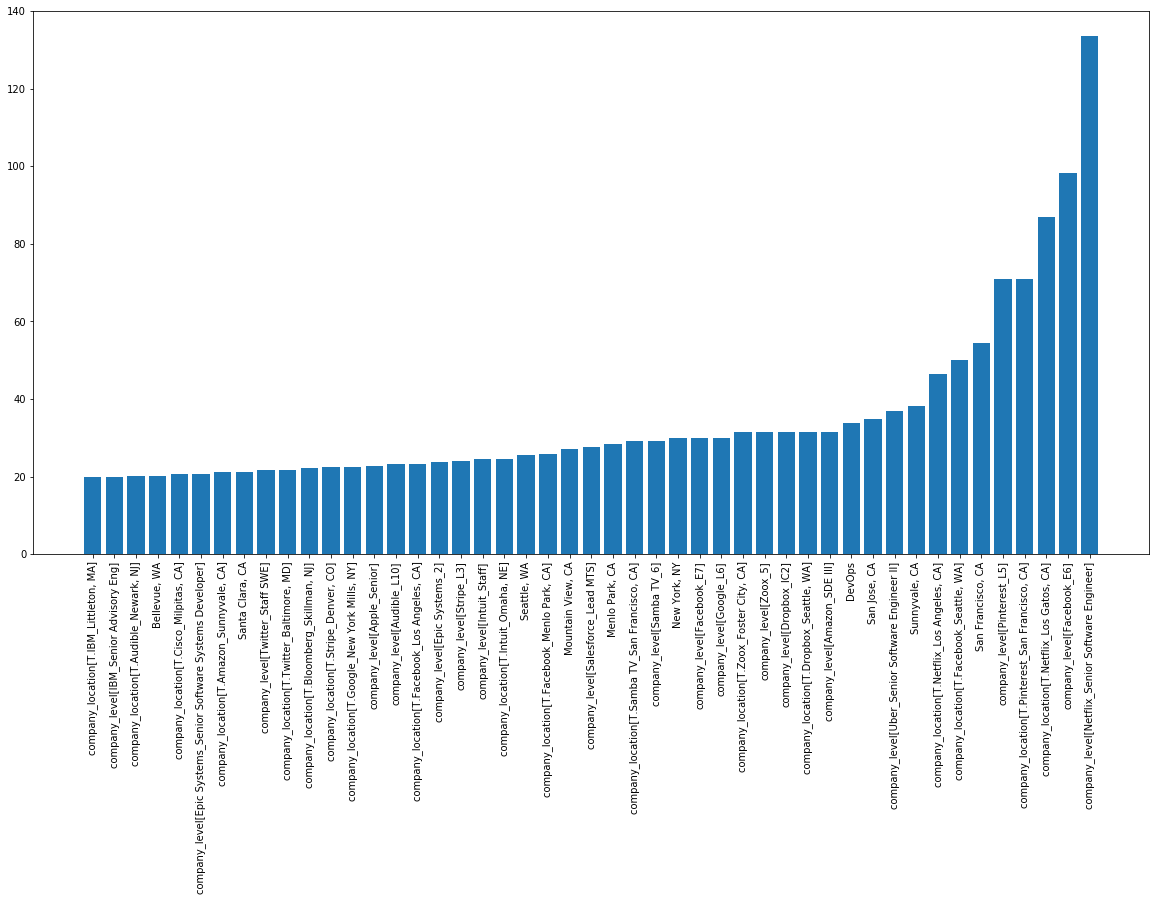

In [20]:
coefs = best_model_salary['coefs']

coefs_increase = best_model_salary['coefs'][best_model_salary['coefs'] > 20]
coefs_increase = coefs_increase.sort_values()
x = plt.bar(coefs_increase.index, coefs_increase)
x = plt.xticks(rotation=90)

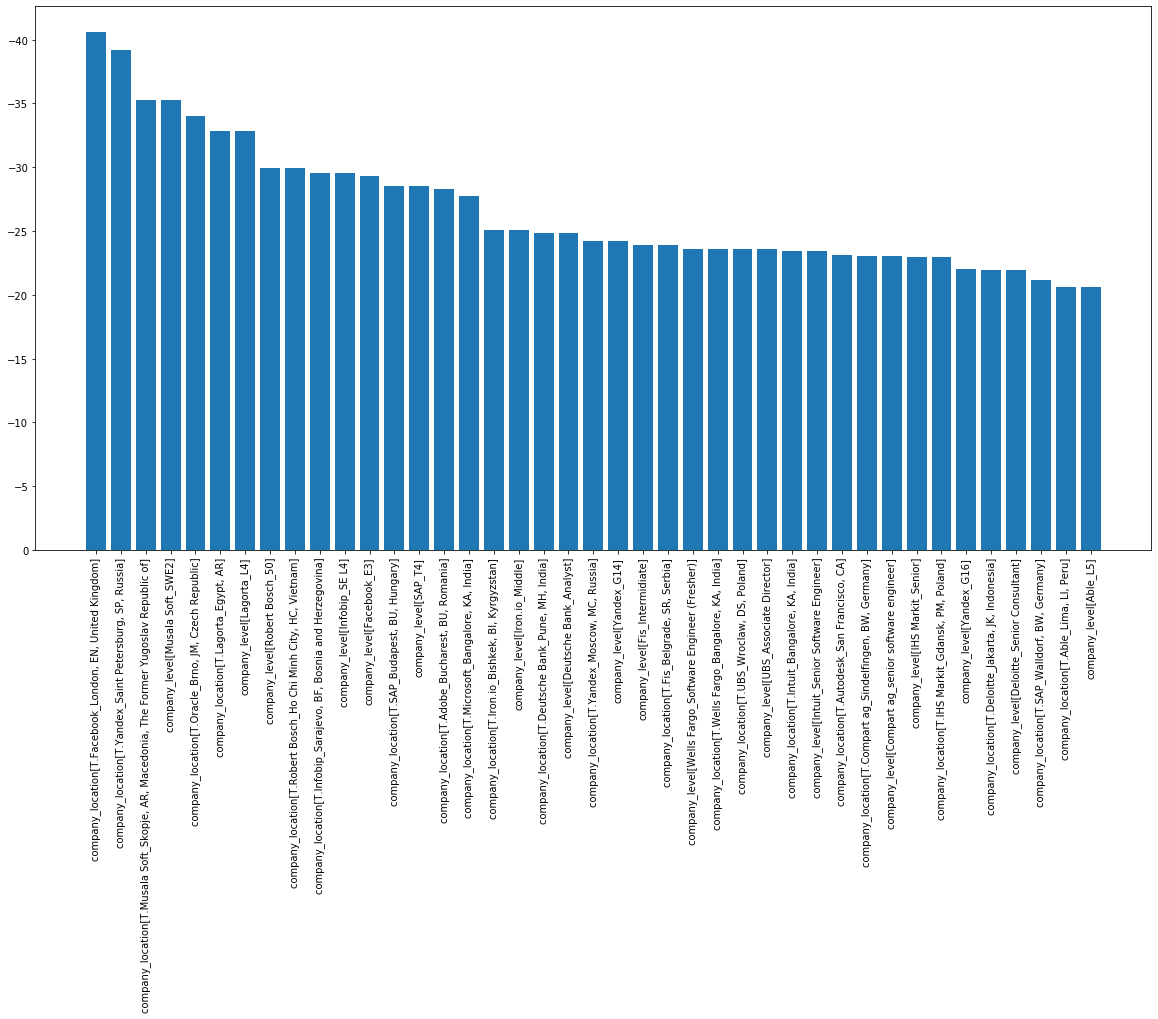

In [21]:
coefs_decrease = best_model_salary['coefs'][best_model_salary['coefs'] < -20]
coefs_decrease = coefs_decrease.sort_values()
x = plt.bar(coefs_decrease.index, coefs_decrease)
x = plt.xticks(rotation=90)
x = plt.gca().invert_yaxis()

In [22]:
coefs.filter(like='Google').sort_values().sort_index()
coefs.filter(like='Facebook').sort_values().sort_index()

company_level[Google_L3]                         -6.874307
company_level[Google_L4]                         13.314240
company_level[Google_L5]                         13.108882
company_level[Google_L6]                         29.929515
company_location[T.Google_Austin, TX]             7.913398
company_location[T.Google_Chicago, IL]            8.683186
company_location[T.Google_Kirkland, WA]          13.244212
company_location[T.Google_Los Angeles, CA]       10.602207
company_location[T.Google_Mountain View, CA]     11.235496
company_location[T.Google_New York Mills, NY]    22.365836
company_location[T.Google_San Francisco, CA]     -4.097961
company_location[T.Google_Seattle, WA]           -2.425222
company_location[T.Google_Sunnyvale, CA]         -6.213149
company_location[T.Google_Tokyo, TY, Japan]     -11.829672
dtype: float64

company_level[Facebook_E3]                                -29.327011
company_level[Facebook_E4]                                -13.181102
company_level[Facebook_E5]                                 -8.936577
company_level[Facebook_E6]                                 98.346579
company_level[Facebook_E7]                                 29.892260
company_location[T.Facebook_London, EN, United Kingdom]   -40.594704
company_location[T.Facebook_Los Angeles, CA]               23.319603
company_location[T.Facebook_Menlo Park, CA]                25.824820
company_location[T.Facebook_New York, NY]                  11.880327
company_location[T.Facebook_San Francisco, CA]              6.301356
company_location[T.Facebook_Seattle, WA]                   50.062747
dtype: float64

In [23]:
coefs.filter(like='San Fran').sort_values()
coefs.filter(like='NY').sort_values()

company_location[T.Autodesk_San Francisco, CA]        -23.124020
company_location[T.Yelp_San Francisco, CA]            -18.851290
company_location[T.Esurance_San Francisco, CA]        -14.217614
company_location[T.Dropbox_San Francisco, CA]         -11.382479
company_location[T.Zillow_San Francisco, CA]          -10.966669
company_location[T.Square_San Francisco, CA]           -8.661187
company_location[T.Instawork_San Francisco, CA]        -6.266652
company_location[T.Grid Dynamics_San Francisco, CA]    -6.117878
company_location[T.Dummy Company_San Francisco, CA]    -4.791187
company_location[T.Google_San Francisco, CA]           -4.097961
company_location[T.eBay_San Francisco, CA]             -1.199766
company_location[T.LiveRamp_San Francisco, CA]         -0.645795
company_location[T.Amazon_San Francisco, CA]           -0.580095
company_location[T.WeWork_San Francisco, CA]           -0.507776
company_location[T.Microsoft_San Francisco, CA]        -0.403819
company_location[T.Pocket

company_location[T.Amazon_New York, NY]               -18.560718
company_location[T.Animoto_New York, NY]               -9.277113
company_location[T.Headstrong_New York, NY]            -8.929349
company_location[T.Uber_New York, NY]                  -6.879896
company_location[T.IBM_New York, NY]                   -6.856210
company_location[T.Fohr_New York, NY]                  -6.294273
company_location[T.Capital One_New York, NY]           -5.996701
company_location[T.LinkedIn_New York, NY]              -4.340915
company_location[T.Citi_New York, NY]                  -3.621007
company_location[T.Goldman Sachs_New York, NY]         -2.509847
company_location[T.The New York Times_New York, NY]    -0.892025
company_location[T.UBS_New York, NY]                    0.707111
company_location[T.Twitter_New York, NY]                2.626163
company_location[T.eBay_New York, NY]                   3.677217
company_location[T.Turbonomic_New York, NY]             4.467678
company_location[T.Capsul